In [57]:
import os 
import pandas as pd
from pathlib import Path

In [73]:
p=Path.cwd()
dp=Path.joinpath(p,'train_values.csv')

In [74]:
df=pd.read_csv(dp)
df.head()
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [75]:
X=df.drop(['patient_id','thal'],axis=1)

In [4]:

df=df.rename(columns={'slope_of_peak_exercise_st_segment':'slope',
                      'fasting_blood_sugar_gt_120_mg_per_dl':'blood_sugar',
                     'serum_cholesterol_mg_per_dl':'serum_cholesterol',
                     'max_heart_rate_achieved':'max_heart_rate',
                     'oldpeak_eq_st_depression':'peak_depressions',
                     'exercise_induced_angina':'angina'})


In [5]:
df.head()

,patient_id,slope,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,blood_sugar,resting_ekg_results,serum_cholesterol,peak_depressions,sex,age,max_heart_rate,angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [6]:
df.isnull().sum()

patient_id                0
slope                     0
thal                      0
resting_blood_pressure    0
chest_pain_type           0
num_major_vessels         0
blood_sugar               0
resting_ekg_results       0
serum_cholesterol         0
peak_depressions          0
sex                       0
age                       0
max_heart_rate            0
angina                    0
dtype: int64

In [7]:
df['thal'].value_counts()

normal               54
reversible_defect    30
fixed_defect          6
Name: thal, dtype: int64

In [8]:
stats=df.groupby(['angina','sex']).agg(['count','mean','std'])
stats

slope                     resting_blood_pressure              \
           count      mean       std                  count        mean   
angina sex                                                                
0      0      21  1.523810  0.679636                     21  129.095238   
       1      37  1.513514  0.606521                     37  132.405405   
1      0      10  2.000000  0.666667                     10  142.500000   
       1      22  1.863636  0.351250                     22  126.909091   

                      chest_pain_type                     num_major_vessels  \
                  std           count      mean       std             count   
angina sex                                                                    
0      0    16.917165              21  3.095238  0.943650                21   
       1    19.593734              37  2.864865  1.084286                37   
1      0    26.487943              10  3.700000  0.674949                10   
       1    17.377898              22  3.681818  0.646335                22   

            ... serum_cholesterol peak_depressions                       age  \
            ...               std            count      mean       std count   
angina sex  ...                                                                
0      0    ...         65.718809               21  0.776190  1.207023    21   
       1    ...         32.190592               37  0.891892  1.024255    37   
1      0    ...         65.143005               10  1.370000  1.349938    10   
       1    ...         39.095731               22  1.759091  1.185893    22   

                                 max_heart_rate                         
                 mean        std          count        mean        std  
angina sex                                                              
0      0    53.238095  10.746650             21  155.380952  21.852863  
       1    52.513514   8.493859             37  159.108108  24.965291  
1      0    54.100000   6.838616             10  151.100000  11.798776  
       1    55.863636   7.421304             22  129.318182  22.741584  

[4 rows x 30 columns]

In [9]:
df['thal']

0     reversible_defect
1                normal
2     reversible_defect
3                normal
4                normal
5                normal
6                normal
7     reversible_defect
8                normal
9                normal
10               normal
11    reversible_defect
12               normal
13    reversible_defect
14               normal
15               normal
16               normal
17               normal
18    reversible_defect
19               normal
20    reversible_defect
21               normal
22               normal
23               normal
24    reversible_defect
25         fixed_defect
26    reversible_defect
27               normal
28               normal
29               normal
            ...        
60               normal
61    reversible_defect
62               normal
63               normal
64               normal
65               normal
66               normal
67    reversible_defect
68    reversible_defect
69               normal
70              

In [10]:
df['thal_c']=df['thal'].map({'reversible_defect':1,'normal':2,'fixed_defect':3})
df['thal_c'].value_counts()

2    54
1    30
3     6
Name: thal_c, dtype: int64

In [11]:
df['age'].describe()

count    90.000000
mean     53.677778
std       8.641197
min      34.000000
25%      46.250000
50%      54.000000
75%      60.000000
max      76.000000
Name: age, dtype: float64

In [12]:
df['stage']=4
df['stage'].loc[df['age'].between(45,60)]=5
df['stage'].loc[df['age']>60]=6

C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df['stage'].value_counts()

5    54
6    19
4    17
Name: stage, dtype: int64

In [14]:
df.groupby('age').count()

,patient_id,slope,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,blood_sugar,resting_ekg_results,serum_cholesterol,peak_depressions,sex,max_heart_rate,angina,thal_c,stage
age,,,,,,,,,,,,,,,
34,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
37,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
39,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
41,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
42,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
43,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
44,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
45,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [15]:
df.corr()

,slope,resting_blood_pressure,chest_pain_type,num_major_vessels,blood_sugar,resting_ekg_results,serum_cholesterol,peak_depressions,sex,age,max_heart_rate,angina,thal_c,stage
slope,1.000000,0.223842,0.163024,0.193691,0.044656,0.148619,0.049093,0.595488,-0.026445,0.155375,-0.340458,0.310725,-0.170270,0.196210
resting_blood_pressure,0.223842,1.000000,-0.066927,0.169652,0.138661,0.182400,0.227196,0.229787,-0.074867,0.257619,-0.072137,0.014140,-0.216360,0.193637
chest_pain_type,0.163024,-0.066927,1.000000,0.182315,-0.115974,0.156845,0.149608,0.321004,-0.059086,0.127901,-0.346625,0.364135,-0.158172,0.155171
num_major_vessels,0.193691,0.169652,0.182315,1.000000,0.005935,0.149202,0.193371,0.347559,0.112786,0.372342,-0.249189,0.158952,-0.241139,0.390573
blood_sugar,0.044656,0.138661,-0.115974,0.005935,1.000000,0.046647,0.021828,0.010572,-0.015071,-0.013641,-0.045391,0.006299,-0.181398,-0.066789
resting_ekg_results,0.148619,0.182400,0.156845,0.149202,0.046647,1.000000,0.163023,0.169409,0.022743,0.124940,-0.024745,0.211753,-0.054583,0.231116
serum_cholesterol,0.049093,0.227196,0.149608,0.193371,0.021828,0.163023,1.000000,0.125321,-0.303276,0.186659,0.077439,0.067082,-0.185178,0.136171
peak_depressions,0.595488,0.229787,0.321004,0.347559,0.010572,0.169409,0.125321,1.000000,0.099069,0.215401,-0.365588,0.317523,-0.285267,0.296737
sex,-0.026445,-0.074867,-0.059086,0.112786,-0.015071,0.022743,-0.303276,0.099069,1.000000,0.013636,-0.113092,0.049933,-0.133191,0.062479
age,0.155375,0.257619,0.127901,0.372342,-0.013641,0.124940,0.186659,0.215401,0.013636,1.000000,-0.422781,0.141305,-0.132425,0.872799


In [16]:

df['stage_sex']=df['stage']+df['sex']


In [17]:
df['stage_sex'].value_counts()

6    45
5    25
7    12
4     8
Name: stage_sex, dtype: int64

In [18]:
df.groupby(['sex','stage']).count()

patient_id  slope  thal  resting_blood_pressure  chest_pain_type  \
sex stage                                                                     
0   4               8      8     8                       8                8   
    5              16     16    16                      16               16   
    6               7      7     7                       7                7   
1   4               9      9     9                       9                9   
    5              38     38    38                      38               38   
    6              12     12    12                      12               12   

           num_major_vessels  blood_sugar  resting_ekg_results  \
sex stage                                                        
0   4                      8            8                    8   
    5                     16           16                   16   
    6                      7            7                    7   
1   4                      9            9                    9   
    5                     38           38                   38   
    6                     12           12                   12   

           serum_cholesterol  peak_depressions  age  max_heart_rate  angina  \
sex stage                                                                     
0   4                      8                 8    8               8       8   
    5                     16                16   16              16      16   
    6                      7                 7    7               7       7   
1   4                      9                 9    9               9       9   
    5                     38                38   38              38      38   
    6                     12                12   12              12      12   

           thal_c  stage_sex  
sex stage                     
0   4           8          8  
    5          16         16  
    6           7          7  
1   4           9          9  
    5          38         38  
    6          12         12

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

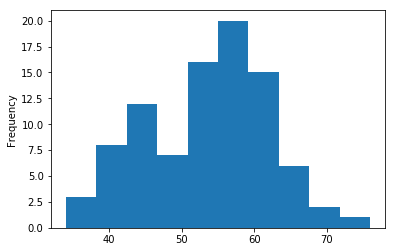

In [20]:
df['age'].plot('hist')

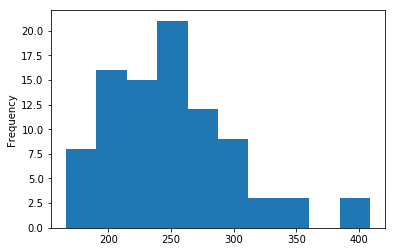

In [21]:
df['serum_cholesterol'].plot('hist')

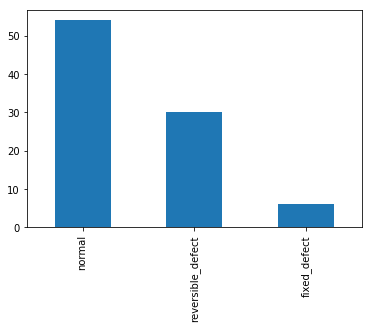

In [26]:
vals=df['thal'].value_counts()
vals.plot('bar')

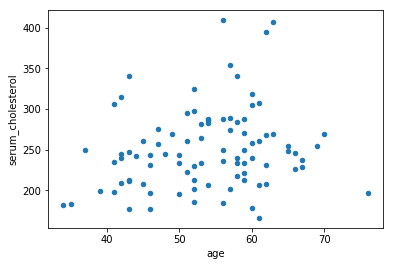

In [30]:
df.plot.scatter('age','serum_cholesterol')

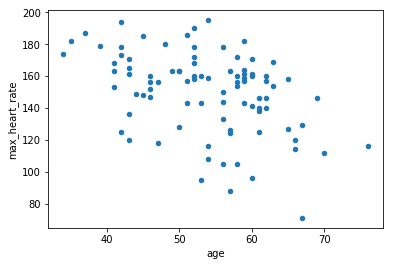

In [32]:
df.plot.scatter('age','max_heart_rate')

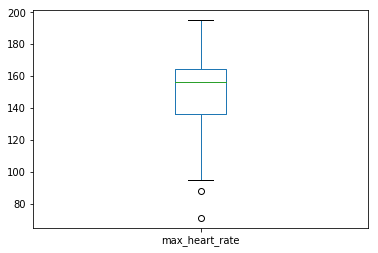

In [31]:
df['max_heart_rate'].plot('box')

In [49]:
X=df.drop(['patient_id','thal'],axis=1)

In [51]:
X.head()

,slope,resting_blood_pressure,chest_pain_type,num_major_vessels,blood_sugar,resting_ekg_results,serum_cholesterol,peak_depressions,sex,age,max_heart_rate,angina,thal_c,stage,stage_sex
0,2,170,1,0,0,2,288,0.2,1,59,159,0,1,5,6
1,1,138,4,0,0,0,183,1.4,0,35,182,0,2,4,4
2,2,120,4,0,0,2,177,2.5,1,43,120,1,1,4,5
3,1,102,3,1,0,0,318,0.0,0,60,160,0,2,5,5
4,2,138,4,1,0,2,166,3.6,1,61,125,1,2,6,7


In [70]:
X.shape

(90, 12)

In [71]:
y.shape

(180, 2)

In [76]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
model=ExtraTreesClassifier()
y=pd.read_csv('train_labels.csv')
y_m=y.drop('patient_id',axis=1)
model = ExtraTreesClassifier()
model.fit(X, y_m)
print(model.feature_importances_)

[0.08302579 0.06974545 0.14312137 0.12423974 0.01783668 0.04532411
 0.07061831 0.09228741 0.06791203 0.10326495 0.06888012 0.11374405]


C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [67]:
X.dtypes

slope_of_peak_exercise_st_segment         int64
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object